<a href="https://colab.research.google.com/github/itz-kap304/Jovian_Data_Analytics/blob/main/L3_Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, we will learn how to merge dataframes, merging them on the index, concatenation along axes, combining/joining data with overlaps, reshaping and pivoting. 

We will also study various data cleaning techniques including removing duplicates, replacing values, renaming axis indexes, discretization and binning, detecting and filtering outliers. We will work on transforming data using a function, mapping, permutation and random sampling, and computing indicators/dummy variables. 

In [ ]:
import pandas as pd
import numpy as np

#2.0 Combining dataframes



Concatenating objects


In [ ]:
"""
In the dataset below, the first column contains information about student identifier and 
the second column contains their respective scores in any subject. 
The structure of the dataframes is same in both cases. We would need to concatenate both of them.
""" 
dataFrame1 =  pd.DataFrame({'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'Score' : [89, 39, 50, 97, 22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
dataFrame2 =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'Score': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})



In [ ]:
# We can do that by using Pandas concat() method. 

dataframe = pd.concat([dataFrame1, dataFrame2], ignore_index=True)
dataframe.head(20)

,StudentID,Score
0,1,89
1,3,39
2,5,50
3,7,97
4,9,22
5,11,66
6,13,31
7,15,51
8,17,71
9,19,91


### 2.0.1 Exercise 
The argument ignore_index creates new index and its absense keeps the original indices. 
Note that we combined the dataframes along axis=0 which would combine together the dataframes along same direction. What if we want to combine both the dataframes side by side?

In [ ]:
# Hint: Try to change value of "axis" argument
#Insert Your Code Here

#Solution: pd.concat([dataFrame1, dataFrame2], axis=1)

### 2.0.2 Exercise
Write a Pandas program to join the two given dataframes along rows and assign all data.



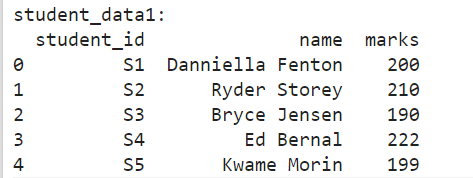

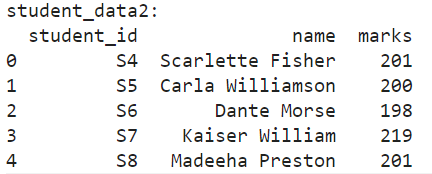

In [ ]:
'''
import pandas as pd

student_data1 = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
         'name': ['Danniella Fenton', 'Ryder Storey', 'Bryce Jensen', 'Ed Bernal', 'Kwame Morin'], 
        'marks': [200, 210, 190, 222, 199]})

student_data2 = pd.DataFrame({
        'student_id': ['S4', 'S5', 'S6', 'S7', 'S8'],
        'name': ['Scarlette Fisher', 'Carla Williamson', 'Dante Morse', 'Kaiser William', 'Madeeha Preston'], 
        'marks': [201, 200, 198, 219, 201]})

result_data = pd.concat([student_data1, student_data2])
print(result_data)

'''

### 2.0.3 Exercise

Use the same dataframes created in the previous exercise and this time join them along the column

In [ ]:
'''
result_data = pd.concat([student_data1, student_data2], axis = 1)
print(result_data)
'''

### 2.0.4 Exercise

Use the same dataframes created in exercise 2.0.2 and write a Pandas program to join the two dataframes using the common column of both dataframes.

In [ ]:
'''
merged_data = pd.merge(student_data1, student_data2, on='student_id', how='inner')
print("Merged data (inner join):")
print(merged_data)
'''


### 2.0.5 Exercise

Use this dataset for this exercise:

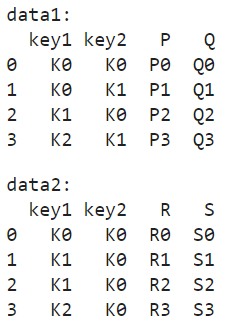

Write a Pandas program to join (left join) the two dataframes using keys from left dataframe only.

In [ ]:
'''
import pandas as pd
data1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'P': ['P0', 'P1', 'P2', 'P3'],
                     'Q': ['Q0', 'Q1', 'Q2', 'Q3']}) 
data2 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'R': ['R0', 'R1', 'R2', 'R3'],
                      'S': ['S0', 'S1', 'S2', 'S3']})
print("\nMerged Data (keys from data1):")
merged_data = pd.merge(data1, data2, how='left', on=['key1', 'key2'])
print(merged_data)
print("\nMerged Data (keys from data2):")
merged_data = pd.merge(data2, data1, how='left', on=['key1', 'key2'])
print(merged_data)
'''

# 2.1 Merging

Lets consider a case where we have two subjects and for each subject we have two datasets

In [ ]:
df1SE =  pd.DataFrame({'StudentID': [9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'ScoreSE' : [22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
df2SE =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'ScoreSE': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

df1ML =  pd.DataFrame({'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'ScoreML' : [39, 49, 55, 77, 52, 86, 41, 77, 73, 51, 86, 82, 92, 23, 49]})
df2ML =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'ScoreML': [93, 44, 78, 97, 87, 89, 39, 43, 88, 78]})

## 2.1.2 Exercise
As you can see in the dataset above, you have two dataframes for each subjects. 

We need to concatenate SE & ML into one dataframe
There are multiple ways to complete the task, Let's go over some ways of doing it. 

##Q1 Concatinate df1SE & df2SE, df1ML & df2ML and then concatenate resulting dataframes together

In [ ]:
# Option 1 - Try Concatenating df1SE & df2SE, df1ML & df2ML and then concatenate resulting dataframes together,
# no need to match student IDs across subjects


"""
Solution
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = pd.concat([dfML, dfSE], axis=1)
"""

,StudentID,ScoreML,StudentID,ScoreSE
0,1.0,39.0,9,22
1,3.0,49.0,11,66
2,5.0,55.0,13,31
3,7.0,77.0,15,51
4,9.0,52.0,17,71
5,11.0,86.0,19,91
6,13.0,41.0,21,56
7,15.0,77.0,23,32
8,17.0,73.0,25,52
9,19.0,51.0,27,73


## Q2 Perform inner join with each dataframe. 
That is to say, if an item exists on the both dataframe, will be included in the new dataframe.
This means, we will get the list of students who are appearing in both the courses.

In [ ]:
# Option 2
"""
Here, you will perform inner join with each dataframe. 
That is to say, if an item exists on the both dataframe, will be included in the new dataframe.
This means, we will get the list of students who are appearing in both the courses.

Hint: Apply Inner Join using merge()
""" 

"""
Solution
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)
df = dfSE.merge(dfML, how='inner')
"""



,StudentID,ScoreSE,ScoreML
0,9,22,52
1,11,66,86
2,13,31,41
3,15,51,77
4,17,71,73
5,19,91,51
6,21,56,86
7,23,32,82
8,25,52,92
9,27,73,23


##Q3 Performing Left Join on Dataframes


In [ ]:
# Option 3
"""
Here, you will perform left join with each dataframe. 
That is to say, if an item exists either in first dataframe or on the both dataframe, will be included in the new dataframe.

Hint: Apply Left Join using merge()
""" 

"""
Solution
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='left')
"""

,StudentID,ScoreSE,ScoreML
0,9,22,52.0
1,11,66,86.0
2,13,31,41.0
3,15,51,77.0
4,17,71,73.0
5,19,91,51.0
6,21,56,86.0
7,23,32,82.0
8,25,52,92.0
9,27,73,23.0


##Q4 Performing Right join on Dataframes

In [ ]:
# Option 4
"""
Here, you will perform Right join with each dataframe. 
That is to say, if an item exists either in second dataframe or on the both dataframe, will be included in the new dataframe.

Hint: Apply Right Join using merge()
""" 

"""
Solution
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='right')
"""

,StudentID,ScoreSE,ScoreML
0,1,NaN,39
1,3,NaN,49
2,5,NaN,55
3,7,NaN,77
4,9,22.0,52
5,11,66.0,86
6,13,31.0,41
7,15,51.0,77
8,17,71.0,73
9,19,91.0,51


##Q5 Performing Outer Join on Dataframes

In [ ]:
# Option 5
"""
Here, you will perform outer join with each dataframe. 
That is to say, if an item exists in either of the dataframes, will be included in the new dataframe.

Hint: Apply Outer Join using merge()
""" 

"""
Solution
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='outer')
"""

,StudentID,ScoreSE,ScoreML
0,9,22.0,52.0
1,11,66.0,86.0
2,13,31.0,41.0
3,15,51.0,77.0
4,17,71.0,73.0
5,19,91.0,51.0
6,21,56.0,86.0
7,23,32.0,82.0
8,25,52.0,92.0
9,27,73.0,23.0


In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1fh7UdeQO0p_yWUAKcCinv9dElxaWQ5Ya")
df.head(10)

,Unnamed: 0,Account,Company,Order,SKU,Country,Year,Quantity,UnitPrice,transactionComplete
0,0,123456779,Kulas Inc,99985,s9-supercomputer,Aruba,1981,5148,545,False
1,1,123456784,GitHub,99986,s4-supercomputer,Brazil,2001,3262,383,False
2,2,123456782,Kulas Inc,99990,s10-supercomputer,Montserrat,1973,9119,407,True
3,3,123456783,My SQ Man,99999,s1-supercomputer,El Salvador,2015,3097,615,False
4,4,123456787,ABC Dogma,99996,s6-supercomputer,Poland,1970,3356,91,True
5,5,123456778,Super Sexy Dingo,99996,s9-supercomputer,Costa Rica,2004,2474,136,True
6,6,123456783,ABC Dogma,99981,s11-supercomputer,Spain,2006,4081,195,False
7,7,123456785,ABC Dogma,99998,s9-supercomputer,Belarus,2015,6576,603,False
8,8,123456778,Loolo INC,99997,s8-supercomputer,Mauritius,1999,2460,36,False
9,9,123456775,Kulas Inc,99997,s7-supercomputer,French Guiana,2004,1831,664,True


In [ ]:
#Task: Add new colum that is the total price based on the product of quantity and the unit price

"""
Solution
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df.head(10)
"""

,Account,Company,Order,SKU,Country,Year,Quantity,UnitPrice,transactionComplete,TotalPrice
0,123456779,Kulas Inc,99985,s9-supercomputer,Aruba,1981,5148,545,False,2805660
1,123456784,GitHub,99986,s4-supercomputer,Brazil,2001,3262,383,False,1249346
2,123456782,Kulas Inc,99990,s10-supercomputer,Montserrat,1973,9119,407,True,3711433
3,123456783,My SQ Man,99999,s1-supercomputer,El Salvador,2015,3097,615,False,1904655
4,123456787,ABC Dogma,99996,s6-supercomputer,Poland,1970,3356,91,True,305396
5,123456778,Super Sexy Dingo,99996,s9-supercomputer,Costa Rica,2004,2474,136,True,336464
6,123456783,ABC Dogma,99981,s11-supercomputer,Spain,2006,4081,195,False,795795
7,123456785,ABC Dogma,99998,s9-supercomputer,Belarus,2015,6576,603,False,3965328
8,123456778,Loolo INC,99997,s8-supercomputer,Mauritius,1999,2460,36,False,88560
9,123456775,Kulas Inc,99997,s7-supercomputer,French Guiana,2004,1831,664,True,1215784


In [ ]:
df['Company'].value_counts()

My SQ Man                   869
Kirlosker Service Center    863
Will LLC                    862
ABC Dogma                   848
Kulas Inc                   840
Gen Power                   836
Name IT                     836
Super Sexy Dingo            828
GitHub                      823
Loolo INC                   822
SAS Web Tec                 798
Pryianka Ji                 775
Name: Company, dtype: int64

In [ ]:
df.describe()

,Account,Order,Year,Quantity,UnitPrice,TotalPrice
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,1.234568e+08,99989.562900,1994.619800,4985.447300,355.866600,1.773301e+06
std,5.741156e+00,5.905551,14.432771,2868.949686,201.378478,1.540646e+06
min,1.234568e+08,99980.000000,1970.000000,0.000000,10.000000,0.000000e+00
25%,1.234568e+08,99985.000000,1982.000000,2505.750000,181.000000,5.003370e+05
50%,1.234568e+08,99990.000000,1995.000000,4994.000000,356.000000,1.335698e+06
75%,1.234568e+08,99995.000000,2007.000000,7451.500000,531.000000,2.711653e+06
max,1.234568e+08,99999.000000,2019.000000,9999.000000,700.000000,6.841580e+06


##Q6 Merging with Hierarchical Indexing

In [ ]:
data = np.arange(15).reshape((3,5))
indexers = ['Rainfall', 'Humidity', 'Wind']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Lucknow', 'Delhi', 'Bengaluru', 'Chennai', 'Kolkata'])
dframe1

,Lucknow,Delhi,Bengaluru,Chennai,Kolkata
Rainfall,0,1,2,3,4
Humidity,5,6,7,8,9
Wind,10,11,12,13,14


In [ ]:
stacked = dframe1.stack()
stacked

Rainfall  Lucknow       0
          Delhi         1
          Bengaluru     2
          Chennai       3
          Kolkata       4
Humidity  Lucknow       5
          Delhi         6
          Bengaluru     7
          Chennai       8
          Kolkata       9
Wind      Lucknow      10
          Delhi        11
          Bengaluru    12
          Chennai      13
          Kolkata      14
dtype: int64

In [ ]:
stacked.unstack()

,Lucknow,Delhi,Bengaluru,Chennai,Kolkata
Rainfall,0,1,2,3,4
Humidity,5,6,7,8,9
Wind,10,11,12,13,14


In [ ]:
series1 = pd.Series([000, 111, 222, 333], index=['zeros','ones', 'twos', 'threes'])
series2 = pd.Series([444, 555, 666], index=['fours', 'fives', 'sixs'])

frame2 = pd.concat([series1, series2], keys=['Number1', 'Number2'])
print(frame2)

"""
How would frame2 look if we try to unstack it?
Try to use unstack() on frame2 
"""

"""
Solution
frame2.unstack()
"""

Number1  zeros       0
         ones      111
         twos      222
         threes    333
Number2  fours     444
         fives     555
         sixs      666
dtype: int64


,fives,fours,ones,sixs,threes,twos,zeros
Number1,NaN,NaN,111.0,NaN,333.0,222.0,0.0
Number2,555.0,444.0,NaN,666.0,NaN,NaN,NaN


# 2.2 Data deduplication

In [ ]:
frame3 = pd.DataFrame({'column 1': ['Looping'] * 3 + ['Functions'] * 4, 'column 2': [10, 10, 22, 23, 23, 24, 24]})
frame3

,column 1,column 2
0,Looping,10
1,Looping,10
2,Looping,22
3,Functions,23
4,Functions,23
5,Functions,24
6,Functions,24


## 2.2.1 Exercise

In [ ]:
"""
Exercise: Check for duplicates in frame3 without dropping them.
"""

"""
Solution
frame3.duplicated()
"""

'\nSolution\nframe3.duplicated()\n'

In [ ]:
import pandas as pd
help(pd.DataFrame.drop_duplicates)

Help on function drop_duplicates in module pandas.core.frame:

drop_duplicates(self, subset: 'Hashable | Sequence[Hashable] | None' = None, keep: "Literal['first'] | Literal['last'] | Literal[False]" = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None'
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to keep.
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : bool, default False
        Whether to drop duplicates in pla

In [ ]:
frame4 = frame3.drop_duplicates()
frame4

,column 1,column 2
0,Looping,10
2,Looping,22
3,Functions,23
5,Functions,24


In [ ]:
frame3['column 3'] = range(7)
#Let's see the result if we try to drop duplicates 
frame5 = frame3.drop_duplicates()
frame5

,column 1,column 2,column 3
0,Looping,10,0
1,Looping,10,1
2,Looping,22,2
3,Functions,23,3
4,Functions,23,4
5,Functions,24,5
6,Functions,24,6


In [ ]:
# We can drop rows by passing in column to be checked for duplicate values
frame3['column 3'] = range(7)
frame5 = frame3.drop_duplicates(['column 2'])
frame5

,column 1,column 2,column 3
0,Looping,10,0
2,Looping,22,2
3,Functions,23,3
5,Functions,24,5


##2.2.2 Exercise

In [ ]:
"""
Exercise: Drop all duplicates from frame3 using bool series
"""
frame3['column 3'] = range(7)

"""
Solution:
bool_series = frame3["column 2"].duplicated(keep = False)
print(bool_series)
frame5 = frame3[~bool_series]
print(frame5)
"""

0     True
1     True
2    False
3     True
4     True
5     True
6     True
Name: column 2, dtype: bool
  column 1  column 2  column 3
2  Looping        22         2


##2.2.3 Exercise

In [ ]:
"""
Exercise: Keep duplicates from frame3 using bool series, 
          drop the first occurance of duplicate values
"""
frame3['column 3'] = range(7)

"""
Solution
bool_series = frame3["column 2"].duplicated(keep ='last')
print(bool_series)
frame5 = frame3[~bool_series]
print(frame5)
"""

0     True
1    False
2    False
3     True
4    False
5     True
6    False
Name: column 2, dtype: bool
    column 1  column 2  column 3
1    Looping        10         1
2    Looping        22         2
4  Functions        23         4
6  Functions        24         6


## 2.2.4 Exercise

In [ ]:
# Given a DataFrame
df = pd.DataFrame({
         'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
         'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
         'rating': [4, 4, 3.5, 15, 5]
    })
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
'''
Exercise :
Remove duplicates specifically on 'Brand' column

Solution :
df.drop_duplicates(subset=['brand'])
'''


,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


## 2.2.5 Exercise

In [ ]:
'''
Exercise :
Remove duplicates and keep last occurrences from the columns of 'Brand' and 'Style'

Solution :
df.drop_duplicates(subset=['brand', 'style'], keep='last')
'''


#2.3 Replacing values

In [ ]:
import numpy as np


In [ ]:
replaceFrame = pd.DataFrame({'column 1': [200., 3000., -786., 3000., 234., 444., -786., 332., 3332. ], 'column 2': range(9)})
replaceFrame.replace(to_replace =-786, value= np.nan)


,column 1,column 2
0,200.0,0
1,3000.0,1
2,NaN,2
3,3000.0,3
4,234.0,4
5,444.0,5
6,NaN,6
7,332.0,7
8,3332.0,8


##2.3.1 Exercise

In [ ]:
replaceFrame = pd.DataFrame({'column 1': [200., 3000., -786., 3000., 234., 444., -786., 332., 3332. ], 'column 2': range(9)})
"""
Exercise: Replace -786 with NaN & 0 with 2
"""

"""
Solution
replaceFrame.replace(to_replace =[-786, 0], value= [np.nan, 2])
"""

,column 1,column 2
0,200.0,2
1,3000.0,1
2,NaN,2
3,3000.0,3
4,234.0,4
5,444.0,5
6,NaN,6
7,332.0,7
8,3332.0,8


##2.3.2 Exercise

Find and replace the missing values in a given DataFrame which do not have any valuable information.

Example:
Missing values: ?, --
Replace those values with NaN



```
ord_no purch_amt    ord_date customer_id salesman_id
0   70001     150.5           ?        3002        5002
1     NaN    270.65  2012-09-10        3001        5003
2   70002     65.26         NaN        3001           ?
3   70004     110.5  2012-08-17        3003        5001
4     NaN     948.5  2012-09-10        3002         NaN
5   70005    2400.6  2012-07-27        3001        5002
6      --      5760  2012-09-10        3001        5001
7   70010         ?  2012-10-10        3004           ?
8   70003     12.43  2012-10-10          --        5003
9   70012    2480.4  2012-06-27        3002        5002
10    NaN    250.45  2012-08-17        3001        5003
11  70013    3045.6  2012-04-25        3001          --
```

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

df = pd.DataFrame({
'ord_no':[70001,np.nan,70002,70004,np.nan,70005,"--",70010,70003,70012,np.nan,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,"?",12.43,2480.4,250.45, 3045.6],
'ord_date': ['?','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3002,3001,3001,3003,3002,3001,3001,3004,"--",3002,3001,3001],
'salesman_id':[5002,5003,"?",5001,np.nan,5002,5001,"?",5003,5002,5003,"--"]})


In [ ]:
# Solution
'''
result = df.replace({"?": np.nan, "--": np.nan})
print(result)
'''

##2.3.3 Exercise

Replace NaNs with a single constant value in specified columns in a DataFrame.

```
ord_no purch_amt    ord_date customer_id salesman_id
0   70001     150.5           ?        3002        5002
1     NaN    270.65  2012-09-10        3001        5003
2   70002     65.26         NaN        3001           ?
3   70004     110.5  2012-08-17        3003        5001
4     NaN     948.5  2012-09-10        3002         NaN
5   70005    2400.6  2012-07-27        3001        5002
6      --      5760  2012-09-10        3001        5001
7   70010         ?  2012-10-10        3004           ?
8   70003     12.43  2012-10-10          --        5003
9   70012    2480.4  2012-06-27        3002        5002
10    NaN    250.45  2012-08-17        3001        5003
11  70013    3045.6  2012-04-25        3001          --
```

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

df = pd.DataFrame({
'ord_no':[70001,np.nan,70002,70004,np.nan,70005,"--",70010,70003,70012,np.nan,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,"?",12.43,2480.4,250.45, 3045.6],
'ord_date': ['?','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3002,3001,3001,3003,3002,3001,3001,3004,"--",3002,3001,3001],
'salesman_id':[5002,5003,"?",5001,np.nan,5002,5001,"?",5003,5002,5003,"--"]})

In [ ]:
# Solution

'''
result = df['ord_no'].fillna(0, inplace=False)
print(result)
'''

##2.3.4 Exercise

Replace NaNs with the value from the previous row or the next row in a given DataFrame.
```
ord_no purch_amt    ord_date customer_id salesman_id
0   70001     150.5           ?        3002        5002
1     NaN    270.65  2012-09-10        3001        5003
2   70002     65.26         NaN        3001           ?
3   70004     110.5  2012-08-17        3003        5001
4     NaN     948.5  2012-09-10        3002         NaN
5   70005    2400.6  2012-07-27        3001        5002
6      --      5760  2012-09-10        3001        5001
7   70010         ?  2012-10-10        3004           ?
8   70003     12.43  2012-10-10          --        5003
9   70012    2480.4  2012-06-27        3002        5002
10    NaN    250.45  2012-08-17        3001        5003
11  70013    3045.6  2012-04-25        3001          --
```

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

df = pd.DataFrame({
'ord_no':[70001,np.nan,70002,70004,np.nan,70005,"--",70010,70003,70012,np.nan,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,"?",12.43,2480.4,250.45, 3045.6],
'ord_date': ['?','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3002,3001,3001,3003,3002,3001,3001,3004,"--",3002,3001,3001],
'salesman_id':[5002,5003,"?",5001,np.nan,5002,5001,"?",5003,5002,5003,"--"]})

In [ ]:
# Solution
'''
df['sale_amt'].fillna(method='bfill', inplace=True)
print(df)
'''

##2.3.5 Exercise

Replace NaNs with the value from the previous row or the next row in a given DataFrame.
```
ord_no purch_amt    ord_date customer_id salesman_id
0   70001     150.5           ?        3002        5002
1     NaN    270.65  2012-09-10        3001        5003
2   70002     65.26         NaN        3001           ?
3   70004     110.5  2012-08-17        3003        5001
4     NaN     948.5  2012-09-10        3002         NaN
5   70005    2400.6  2012-07-27        3001        5002
6      --      5760  2012-09-10        3001        5001
7   70010         ?  2012-10-10        3004           ?
8   70003     12.43  2012-10-10          --        5003
9   70012    2480.4  2012-06-27        3002        5002
10    NaN    250.45  2012-08-17        3001        5003
11  70013    3045.6  2012-04-25        3001          --
```

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

df = pd.DataFrame({
'ord_no':[70001,np.nan,70002,70004,np.nan,70005,"--",70010,70003,70012,np.nan,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,"?",12.43,2480.4,250.45, 3045.6],
'ord_date': ['?','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3002,3001,3001,3003,3002,3001,3001,3004,"--",3002,3001,3001],
'salesman_id':[5002,5003,"?",5001,np.nan,5002,5001,"?",5003,5002,5003,"--"]})

In [ ]:
# Solution
df['purch_amt'].fillna(df['purch_amt'].median(), inplace=True)
print(df)
print("Using mean to replace NaN:")
df['sale_amt'].fillna(int(df['sale_amt'].mean()), inplace=True)
print(df)

# 2.4 Handling missing data

In [ ]:
data = np.arange(15, 30).reshape(5, 3)
df_store = pd.DataFrame(data, index=['apple', 'banana', 'kiwi', 'grapes', 'mango'], columns=['store1', 'store2', 'store3'])
df_store

,store1,store2,store3
apple,15,16,17
banana,18,19,20
kiwi,21,22,23
grapes,24,25,26
mango,27,28,29


In [ ]:
df_store['store4'] = np.nan
df_store.loc['watermelon'] = np.arange(15, 19)
df_store.loc['oranges'] = np.nan
df_store['store5'] = np.nan
df_store['store4']['apple'] = 20.
df_store

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
watermelon,15.0,16.0,17.0,18.0,NaN
oranges,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_store.isnull()

,store1,store2,store3,store4,store5
apple,False,False,False,False,True
banana,False,False,False,True,True
kiwi,False,False,False,True,True
grapes,False,False,False,True,True
mango,False,False,False,True,True
watermelon,False,False,False,False,True
oranges,True,True,True,True,True


##2.4.1 Exercise

In [ ]:
"""
Exercise: Check for non null values in df_store
"""

"""
Solution
df_store.notnull()
"""

,store1,store2,store3,store4,store5
apple,True,True,True,True,False
banana,True,True,True,False,False
kiwi,True,True,True,False,False
grapes,True,True,True,False,False
mango,True,True,True,False,False
watermelon,True,True,True,True,False
oranges,False,False,False,False,False


In [ ]:
df_store.isnull().sum()

store1    1
store2    1
store3    1
store4    5
store5    7
dtype: int64

## 2.4.2 Exercise Find All Null Values


In [ ]:
"""
Exercise: Return sum of ALL null values in df_store
"""

"""
Solution
df_store.isnull().sum().sum()
"""

15

In [ ]:
df_store.count()

store1    6
store2    6
store3    6
store4    2
store5    0
dtype: int64

In [ ]:
"""
Exercise: Return ALL non null values in "store4" of df_store
"""

"""
Solution
df_store.store4[df_store.store4.notnull()]
"""

apple         20.0
watermelon    18.0
Name: store4, dtype: float64

In [ ]:
df_store.store4.dropna()


apple         20.0
watermelon    18.0
Name: store4, dtype: float64

In [ ]:
df_store.dropna()

,store1,store2,store3,store4,store5


In [ ]:
"""
Exercise: Drop rows with ALL null values in df_store
"""

"""
Solution
df_store.dropna(how='all')
"""

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
watermelon,15.0,16.0,17.0,18.0,NaN


In [ ]:
"""
Exercise: Drop columns with ALL null values in df_store
"""

"""
Solution
df_store.dropna(how='all', axis=1)
"""

,store1,store2,store3,store4
apple,15.0,16.0,17.0,20.0
banana,18.0,19.0,20.0,NaN
kiwi,21.0,22.0,23.0,NaN
grapes,24.0,25.0,26.0,NaN
mango,27.0,28.0,29.0,NaN
watermelon,15.0,16.0,17.0,18.0
oranges,NaN,NaN,NaN,NaN


In [ ]:
df_store2 = df_store.copy()
df_store2.loc['oranges'].store1 = 0
df_store2.loc['oranges'].store3 = 0
df_store2

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
watermelon,15.0,16.0,17.0,18.0,NaN
oranges,0.0,NaN,0.0,NaN,NaN


In [ ]:
df_store2.dropna(how='any', axis=1)

,store1,store3
apple,15.0,17.0
banana,18.0,20.0
kiwi,21.0,23.0
grapes,24.0,26.0
mango,27.0,29.0
watermelon,15.0,17.0
oranges,0.0,0.0


In [ ]:
"""
Exercise: Drop columns with alteast 5 null values 
"""

"""
Solution
df_store.dropna(thresh=5, axis=1)
"""

,store1,store2,store3
apple,15.0,16.0,17.0
banana,18.0,19.0,20.0
kiwi,21.0,22.0,23.0
grapes,24.0,25.0,26.0
mango,27.0,28.0,29.0
watermelon,15.0,16.0,17.0
oranges,NaN,NaN,NaN


##2.4.3 NaN values in mathematical operations

In [ ]:
ar1 = np.array([100, 200, np.nan, 300])
ser1 = pd.Series(ar1)

ar1.mean(), ser1.mean()

(nan, 200.0)

In [ ]:
ser2 = df_store.store4
ser2.sum()

38.0

In [ ]:
ser2.mean()

19.0

In [ ]:
ser2.cumsum()

apple         20.0
banana         NaN
kiwi           NaN
grapes         NaN
mango          NaN
watermelon    38.0
oranges        NaN
Name: store4, dtype: float64

##2.4.4 Exercise

In [ ]:
"""
Exercise: Add 1 to all non null values of store4 in df_store
"""

"""
Solution
df_store.store4 + 1
"""

apple         21.0
banana         NaN
kiwi           NaN
grapes         NaN
mango          NaN
watermelon    19.0
oranges        NaN
Name: store4, dtype: float64

##2.4.5 Exercise

Program to detect missing values of a given DataFrame. Display True or False.
```
     ord_no  purch_amt    ord_date  customer_id  salesman_id
0   70001.0     150.50  2012-10-05         3002       5002.0
1       NaN     270.65  2012-09-10         3001       5003.0
2   70002.0      65.26         NaN         3001       5001.0
3   70004.0     110.50  2012-08-17         3003          NaN
4       NaN     948.50  2012-09-10         3002       5002.0
5   70005.0    2400.60  2012-07-27         3001       5001.0
6       NaN    5760.00  2012-09-10         3001       5001.0
7   70010.0    1983.43  2012-10-10         3004          NaN
8   70003.0    2480.40  2012-10-10         3003       5003.0
9   70012.0     250.45  2012-06-27         3002       5002.0
10      NaN      75.29  2012-08-17         3001       5003.0
11  70013.0    3045.60  2012-04-25         3001          NaN

```

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

df = pd.DataFrame({
'ord_no':[70001,np.nan,70002,70004,np.nan,70005,np.nan,70010,70003,70012,np.nan,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
'ord_date': ['2012-10-05','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3002,3001,3001,3003,3002,3001,3001,3004,3003,3002,3001,3001],
'salesman_id':[5002,5003,5001,np.nan,5002,5001,5001,np.nan,5003,5002,5003,np.nan]})

'''
print("\nMissing values of the said dataframe:")
print(df.isna())
'''

#2.5 Filling in missing data


In [ ]:
filledDf = df_store.fillna(0)
filledDf

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,0.0
banana,18.0,19.0,20.0,0.0,0.0
kiwi,21.0,22.0,23.0,0.0,0.0
grapes,24.0,25.0,26.0,0.0,0.0
mango,27.0,28.0,29.0,0.0,0.0
watermelon,15.0,16.0,17.0,18.0,0.0
oranges,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_store.mean()

store1    20.0
store2    21.0
store3    22.0
store4    19.0
store5     NaN
dtype: float64

## 2.5.1 Exercise

In [ ]:
"""
Exercise: Calculate mean of all stores in filledDf
"""

"""
Solution
filledDf.mean()
"""

store1    17.142857
store2    18.000000
store3    18.857143
store4     5.428571
store5     0.000000
dtype: float64

##2.5.2 Forward and backward filling of the missing values

In [ ]:
df_store.store4.fillna(method='ffill')

apple         20.0
banana        20.0
kiwi          20.0
grapes        20.0
mango         20.0
watermelon    18.0
oranges       18.0
Name: store4, dtype: float64

In [ ]:
df_store.store4.fillna(method='bfill')

apple         20.0
banana        18.0
kiwi          18.0
grapes        18.0
mango         18.0
watermelon    18.0
oranges        NaN
Name: store4, dtype: float64

##2.5.3 Filling with index labels


In [ ]:
to_fill = pd.Series([14, 23, 12], index=['apple', 'mango', 'oranges'])
to_fill

apple      14
mango      23
oranges    12
dtype: int64

In [ ]:
df_store.store4.fillna(to_fill)


'\nSolution\ndf_store.store4.fillna(to_fill)\n'

In [ ]:
df_store.mean()

store1    20.0
store2    21.0
store3    22.0
store4    19.0
store5     NaN
dtype: float64

##2.5.4 Exercise

In [ ]:
"""
Exercise: Use mean of each store in df_store to populate respective null values in the columns
"""
df_store.fillna(df_store.mean())

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,19.0,NaN
kiwi,21.0,22.0,23.0,19.0,NaN
grapes,24.0,25.0,26.0,19.0,NaN
mango,27.0,28.0,29.0,19.0,NaN
watermelon,15.0,16.0,17.0,18.0,NaN
oranges,20.0,21.0,22.0,19.0,NaN


##2.5.5 Interpolation of missing values

In [ ]:
ser3 = pd.Series([100, np.nan, np.nan, np.nan, 292])
ser3.interpolate()

0    100.0
1    148.0
2    196.0
3    244.0
4    292.0
dtype: float64

In [ ]:
from datetime import datetime
ts = pd.Series([10, np.nan, np.nan, 9], 
               index=[datetime(2019, 1,1), 
                      datetime(2019, 2,1), 
                      datetime(2019, 3,1),
                      datetime(2019, 5,1)])

ts

2019-01-01    10.0
2019-02-01     NaN
2019-03-01     NaN
2019-05-01     9.0
dtype: float64

In [ ]:
"""
Exercise: Use interpolate() to fill ts
"""

"""
Solution
ts.interpolate()
"""

2019-01-01    10.000000
2019-02-01     9.666667
2019-03-01     9.333333
2019-05-01     9.000000
dtype: float64

In [ ]:
ts.interpolate(method='time')

2019-01-01    10.000000
2019-02-01     9.741667
2019-03-01     9.508333
2019-05-01     9.000000
dtype: float64

#2.6 Renaming axis indexes

In [ ]:
import numpy as np
import pandas as pd
data = np.arange(15).reshape((3,5))
indexers = ['Rainfall', 'Humidity', 'Wind']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Lucknow', 'Delhi', 'Bengaluru', 'Chennai', 'Kolkata'])
dframe1

,Lucknow,Delhi,Bengaluru,Chennai,Kolkata
Rainfall,0,1,2,3,4
Humidity,5,6,7,8,9
Wind,10,11,12,13,14


In [ ]:
# Say, you want to transform the index terms to capital letter. 

dframe1.index = dframe1.index.map(str.upper)
dframe1

,Lucknow,Delhi,Bengaluru,Chennai,Kolkata
RAINFALL,0,1,2,3,4
HUMIDITY,5,6,7,8,9
WIND,10,11,12,13,14


##2.6.1 Exercise

In [ ]:
"""
Exercise: Rename dframe1 index to Title Case & Column Names to Capital/Upper Case
"""

"""
Solution
dframe1.rename(index=str.title, columns=str.upper)
"""

,LUCKNOW,DELHI,BENGALURU,CHENNAI,KOLKATA
Rainfall,0,1,2,3,4
Humidity,5,6,7,8,9
Wind,10,11,12,13,14


## 2.6.2 Exercise

In [ ]:
'''
Exercise : Try using inplace = True. What is the difference/significance of this command?
'''

'''
Solution
dframe1.rename(index=str.title, columns=str.upper, inplace = True)
'''

## 2.6.3 Exercise

In [ ]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [ ]:
'''
Rename the indices of the dataframe mentioned above.
'''

'''
Solution
df.rename(index={0: "x", 1: "y", 2: "z"})
'''

'\nSolution\ndf.rename(index={0: "x", 1: "y", 2: "z"})\n'

## 2.6.4 Exercise

In [ ]:
'''
Rename the indices 1 as 2 and 2 as 4
'''

'''
df.rename({1: 2, 2: 4}, axis='index')
'''

##2.6.5 Exercise

In [ ]:
"""
Exercise: Rename dframe1 index to Lower Case & Column Names to lower Case
"""

"""
Solution
"""
dframe1.rename(index=str.lower, columns=str.lower)


,lucknow,delhi,bengaluru,chennai,kolkata
rainfall,0,1,2,3,4
humidity,5,6,7,8,9
wind,10,11,12,13,14


#2.7 Discretization and binning


In [ ]:
import pandas as pd

height = [120, 122, 125, 127, 121, 123, 137, 131, 161, 145, 141, 132]

bins = [118, 125, 135, 160, 200]

category = pd.cut(height, bins)

category

[(118, 125], (118, 125], (118, 125], (125, 135], (118, 125], ..., (125, 135], (160, 200], (135, 160], (135, 160], (125, 135]]
Length: 12
Categories (4, interval[int64, right]): [(118, 125] < (125, 135] < (135, 160] < (160, 200]]

##2.7.1 Exercise

In [ ]:
"""
Exercise: Get frequency of items in every bin
Hint use value_counts()
"""

"""
Solution
pd.value_counts(category)
"""

'\nSolution\npd.value_counts(category)\n'

##2.7.2 Exercise

In [ ]:
"""
Exercise: Change the default behaviour of pd.cut() to include 
right value of bin and exclude left 
This would be inverse of its natural behaviour of including left limit and exclude right limit
"""

"""
Solution
category2 = pd.cut(height, [118, 126, 136, 161, 200], right=False)

category2
"""


[[118, 126), [118, 126), [118, 126), [126, 136), [118, 126), ..., [126, 136), [161, 200), [136, 161), [136, 161), [126, 136)]
Length: 12
Categories (4, interval[int64, left]): [[118, 126) < [126, 136) < [136, 161) < [161, 200)]

## 2.7.3 Exercise

In [ ]:
"""
Exercise: Use phrases as bin labels
"""

"""
Solution
bin_names = ['Short Height', 'Averge height', 'Good Height', 'Taller']
pd.cut(height, bins, labels=bin_names)
"""

['Short Height', 'Short Height', 'Short Height', 'Averge height', 'Short Height', ..., 'Averge height', 'Taller', 'Good Height', 'Good Height', 'Averge height']
Length: 12
Categories (4, object): ['Short Height' < 'Averge height' < 'Good Height' < 'Taller']

##2.7.4 Exercise

In [ ]:
"""
Exercise: Generate 40 numbers from range [0,1] use Integer value as number of bins
Set precision value as 3
"""
import numpy as np

pd.cut(np.random.rand(40), 5, precision=3)


[(0.752, 0.94], (0.752, 0.94], (0.00184, 0.19], (0.377, 0.565], (0.752, 0.94], ..., (0.00184, 0.19], (0.377, 0.565], (0.00184, 0.19], (0.377, 0.565], (0.19, 0.377]]
Length: 40
Categories (5, interval[float64, right]): [(0.00184, 0.19] < (0.19, 0.377] < (0.377, 0.565] <
                                           (0.565, 0.752] < (0.752, 0.94]]

##2.7.5 Exercise

In [ ]:
"""
Generate 50 numerical values between [0,1] and use Qcut to
cut it into quartiles

Qcut (quantile-cut) differs from cut in the sense that, in qcut,
the number of elements in each bin will be roughly the same,
but this will come at the cost of differently sized interval widths.
""" 
randomNumbers = np.random.rand(50)
category3 = pd.qcut(randomNumbers, 4) 
#pd.qcut(randomNumbers, [0, 0.1, 0.5, 0.7, 1.0]) Explicitly bin range
category3

[(0.762, 0.989], (0.267, 0.584], (0.762, 0.989], (0.0423, 0.267], (0.584, 0.762], ..., (0.762, 0.989], (0.267, 0.584], (0.584, 0.762], (0.762, 0.989], (0.584, 0.762]]
Length: 50
Categories (4, interval[float64, right]): [(0.0423, 0.267] < (0.267, 0.584] < (0.584, 0.762] <
                                           (0.762, 0.989]]

In [ ]:
pd.value_counts(category3)

(0.00537, 0.29]    13
(0.783, 0.989]     13
(0.29, 0.538]      12
(0.538, 0.783]     12
dtype: int64

#2.8 Permunation and Random sampling

In [ ]:
dat = np.arange(80).reshape(10,8)
df = pd.DataFrame(dat)

df

,0,1,2,3,4,5,6,7
0,0,1,2,3,4,5,6,7
1,8,9,10,11,12,13,14,15
2,16,17,18,19,20,21,22,23
3,24,25,26,27,28,29,30,31
4,32,33,34,35,36,37,38,39
5,40,41,42,43,44,45,46,47
6,48,49,50,51,52,53,54,55
7,56,57,58,59,60,61,62,63
8,64,65,66,67,68,69,70,71
9,72,73,74,75,76,77,78,79


In [ ]:
sampler = np.random.permutation(10)
sampler

array([2, 3, 1, 7, 5, 8, 9, 0, 6, 4])

In [ ]:
df.take(sampler)

,0,1,2,3,4,5,6,7
2,16,17,18,19,20,21,22,23
3,24,25,26,27,28,29,30,31
1,8,9,10,11,12,13,14,15
7,56,57,58,59,60,61,62,63
5,40,41,42,43,44,45,46,47
8,64,65,66,67,68,69,70,71
9,72,73,74,75,76,77,78,79
0,0,1,2,3,4,5,6,7
6,48,49,50,51,52,53,54,55
4,32,33,34,35,36,37,38,39


In [ ]:
# Random sample without replacement

df.take(np.random.permutation(len(df))[:3])

,0,1,2,3,4,5,6,7
6,48,49,50,51,52,53,54,55
2,16,17,18,19,20,21,22,23
3,24,25,26,27,28,29,30,31


In [ ]:
# Random sample with replacement
sack = np.array([4, 8, -2, 7, 5])
sampler = np.random.randint(0, len(sack), size = 10)
sampler

array([2, 3, 4, 4, 1, 2, 1, 1, 2, 4])

##2.8.1 Exercise

In [ ]:
"""
Exercise: Draw numbers from sack using sampler
"""

"""
Solution
draw = sack.take(sampler)
draw 
"""


array([-2,  7,  5,  5,  8, -2,  8,  8, -2,  5])

## 2.8.2 Exercise

In [ ]:
'''
Exercise : 
Create a random numpy array with integers between -10 and 10 containing 5 integers.
Find out the standard deviation of the array.

Solution :
import numpy as np
arr = np.random.randint(-10,10,size=5)
arr
import pandas as pd
arr_df = pd.DataFrame(arr)
arr_df.describe()

'''

array([-1, -7,  4, -8, -4])

## 2.8.3 Exercise

In [ ]:
'''
Exercise :
Create a random numpy array containing 9 integers and reshape it into a 3*3 array.
Replace the integers in the 2nd row with random negative integers.

Solution :
arr = np.arange(9).reshape((3, 3))
array = np.random.permutation(arr)
array
for i in range (0,3):
  array[1][i]= np.random.randint(-5,-2)
array
'''

'\nExercise :\nCreate a random numpy array containing 9 integers and reshape it into a 3*3 array.\nReplace the integers in the 2nd row with random negative integers.\n\nSolution :\narr = np.arange(9).reshape((3, 3))\narray = np.random.permutation(arr)\narray\nfor i in range (0,3):\n  array[1][i]= np.random.randint(-5,-2)\narray\n'

## 2.8.4 Exercise

In [ ]:
'''
Exercise :
Generate a uniform random sample from np.arange(5) of size 3 without replacement:
(a) using choice
(b) using permutation

Solution :
np.random.choice(5, 3, replace=False)
np.random.permutation(np.arange(5))[:3]
'''


7.13241232488206

## 2.8.5 Exercise

In [ ]:
'''
Exercise : 
(a) Generate a 2 x 4 array of ints between 0 and 4, inclusive:
(b) Generate a 1 by 3 array with 3 different lower bounds
(c) Generate a 1 x 3 array with 3 different upper bound

Solution :
rng = np.random.default_rng()
rng.integers(5, size=(2, 4))
rng.integers([1, 5, 7], 10)
rng.integers(1, [3, 5, 10])
'''

#2.9 Dummy variables

In [ ]:
df = pd.DataFrame({'gender': ['female', 'female', 'male', 'unknown', 'male', 'female'], 'votes': range(6, 12, 1)})
df

,gender,votes
0,female,6
1,female,7
2,male,8
3,unknown,9
4,male,10
5,female,11


In [ ]:
pd.get_dummies(df['gender'])

,female,male,unknown
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0


In [ ]:
dummies = pd.get_dummies(df['gender'], prefix='gender')
dummies

,gender_female,gender_male,gender_unknown
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0


##2.9.1 Exercise 

In [ ]:
"""
Exercise Join votes column with dummies dataframe
"""

"""
Solution
with_dummy = df[['votes']].join(dummies)
with_dummy
"""


,votes,gender_female,gender_male,gender_unknown
0,6,1,0,0
1,7,1,0,0
2,8,0,1,0
3,9,0,0,1
4,10,0,1,0
5,11,1,0,0


##  2.9.2 Exercise

Create a dataframe consisting of the following data and Get the Dummy variables from the dataframe:

ids = [11, 22, 33, 44, 55, 66, 77]

countries = ['Spain', 'France', 'Spain', 'Germany', 'France']

In [ ]:
import pandas as pd

ids = [11, 22, 33, 44, 55, 66, 77]
countries = ['Spain', 'France', 'Spain', 'Germany', 'France']

df = pd.DataFrame(list(zip(ids, countries)),
                  columns=['Ids', 'Countries'])

In [ ]:
y = pd.get_dummies(df.Countries, prefix='Country')
print(y.head())

   Country_France  Country_Germany  Country_Spain
0               0                0              1
1               1                0              0
2               0                0              1
3               0                1              0
4               1                0              0


##2.9.3 Exercise

Get Dummy Variables from following data


df = pd.DataFrame({
  
    'A': ['hello', 'vignan', 'geeks'],
                   
                   
    'B': ['vignan', 'hello', 'hello'],
  
  
    'C': [1, 2, 3]
  })

In [ ]:
"""
Solution
"""
import pandas as pd
import numpy as np
 
# create dataset
df = pd.DataFrame({'A': ['hello', 'vignan', 'geeks'],
                   'B': ['vignan', 'hello', 'hello'],
                   'C': [1, 2, 3]})
 
# display dataset
print(df)
 
# create dummy variables
pd.get_dummies(df)

        A       B  C
0   hello  vignan  1
1  vignan   hello  2
2   geeks   hello  3


,C,A_geeks,A_hello,A_vignan,B_hello,B_vignan
0,1,0,1,0,0,1
1,2,0,0,1,1,0
2,3,1,0,0,1,0


## 2.9.4 Exercise

(a) Find the number of unique values in the location column of the following dataset. [Dataset](https://drive.google.com/file/d/1FyYE1_hbmn5L0TX80B6cKT0UljC_-YAd/view?usp=sharing)



In [ ]:
'''
import opendatasets as od
link = "https://drive.google.com/file/d/1FyYE1_hbmn5L0TX80B6cKT0UljC_-YAd/view?usp=sharing"
dataframe = od.download(link)
train_inputs.Location.unique()
'''

## 2.9.5 Exercise

(b) Carry out One-Hot encoding using scikit learn on the cities column of this dataset. [Dataset](https://drive.google.com/file/d/1FyYE1_hbmn5L0TX80B6cKT0UljC_-YAd/view?usp=sharing)

In [ ]:
'''
import opendatasets as od
link = "https://drive.google.com/file/d/1FyYE1_hbmn5L0TX80B6cKT0UljC_-YAd/view?usp=sharing"
dataframe = od.download(link)


from sklearn.preprocessing import OneHotEncoder

categorical_cols = dataframe.select_dtypes('object').columns.tolist()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(dataframe[categorical_cols])
'''

'\nimport opendatasets as od\nlink = "https://drive.google.com/file/d/1FyYE1_hbmn5L0TX80B6cKT0UljC_-YAd/view?usp=sharing"\ndataframe = od.download(link)\n\n\nfrom sklearn.preprocessing import OneHotEncoder\n\ncategorical_cols = dataframe.select_dtypes(\'object\').columns.tolist()\nencoder = OneHotEncoder(sparse=False, handle_unknown=\'ignore\').fit(dataframe[categorical_cols])\n'

# 2.10 Univariate Outliers and Multivariate Outliers

An outlier is data point that consists of an extreme value. In case of Univariate outlier, the extreme value is of a single variable.  A multivariate outlier is a combination of unusual scores on at least two variables.  Both types of outliers can influence the outcome of statistical analyses.

Outliers exist for four reasons :

* Incorrect data entry can cause data to contain extreme cases.
* Failure to indicate codes for missing values in a dataset.
* Case might not have come from the intended sample.
* The distribution of the sample for specific variables may have a more extreme distribution than normal.

## Univariate Outliers Exercises

### 2.10.1 Exercise

[Dataset](https://drive.google.com/file/d/1fMSEO-eyLrpd_hv8wxajrjXyuL1JckwZ/view?usp=sharing) for this exercise.

Use Z-Score method to detect the univariate outliers in this dataset

In [ ]:
cd /content

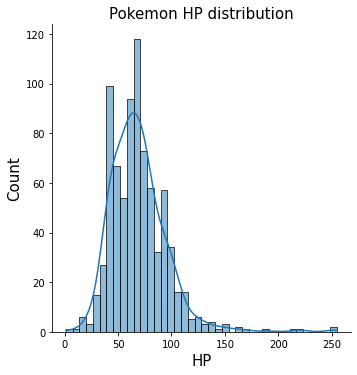

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#create the displot

pokemon = pd.read_csv('pokemon.csv')

sns.displot(pokemon["hp"],
           kde = True)
#label the axis
plt.xlabel("HP", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Pokemon HP distribution", fontsize = 15)
plt.show()

In [ ]:
#calculate the Z score
pokemon["HP_z"] = (pokemon["hp"] - pokemon["hp"].mean())/pokemon["hp"].std()

In [ ]:
new_df = pokemon[pokemon["HP_z"]>3]

In [ ]:
new_df['hp']

112    250
142    160
201    190
241    255
288    150
320    170
425    150
486    150
593    165
717    216
798    223
Name: hp, dtype: int64

### 2.10.2 Exercise

[Dataset](https://drive.google.com/file/d/1fMSEO-eyLrpd_hv8wxajrjXyuL1JckwZ/view?usp=sharing) for this exercise.

Use boxplot to detect the univariate outliers in this dataset 

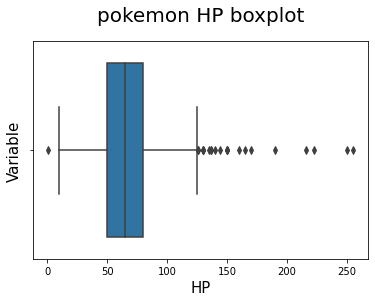

In [ ]:
#create the boxplot
ax = sns.boxplot(x = pokemon["hp"])
#add labels to the plot
ax.set_xlabel("HP", fontsize = 15)
ax.set_ylabel("Variable", fontsize = 15)
ax.set_title("pokemon HP boxplot", fontsize =20, pad = 20)
plt.show()

### 2.10.3 Exercise


[Dataset](https://drive.google.com/file/d/1fMSEO-eyLrpd_hv8wxajrjXyuL1JckwZ/view?usp=sharing) for this exercise.

Use Turkey fencing technique to detect the univariate outliers in this dataset 

In [ ]:
#extract the upper and lower quantiles
pokemon_HP_lq = pokemon["hp"].quantile(0.25)
pokemon_HP_uq = pokemon["hp"].quantile(0.75)
#extract the inter quartile range
pokemon_HP_iqr = pokemon_HP_uq - pokemon_HP_lq
#get the upper and lower bounds
lower_bound = pokemon_HP_lq - 3*pokemon_HP_iqr
upper_bound = pokemon_HP_uq + 3*pokemon_HP_iqr
#extract values outside these bounds 
Pokemon_IQR_outliers = pokemon[(pokemon.hp <= lower_bound) | (pokemon.hp >= upper_bound)]
Pokemon_IQR_outliers

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,HP_z
112,"['Natural Cure', 'Serene Grace', 'Healer']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,113,35,105,50,normal,NaN,34.6,1,0,6.812203
201,"['Shadow Tag', 'Telepathy']",2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,202,33,58,33,psychic,NaN,28.5,2,0,4.554528
241,"['Natural Cure', 'Serene Grace', 'Healer']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,242,75,135,55,normal,NaN,46.8,2,0,7.000342
320,"['Water Veil', 'Oblivious', 'Pressure']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,321,90,45,60,water,NaN,398.0,3,0,3.801970
717,"['Aura Break', 'Power Construct']",1.0,1.0,2.0,0.0,2.0,1.0,0.5,1.0,1.0,...,718,91,95,85,dragon,ground,284.6,6,1,5.532854
798,['Beast Boost'],2.0,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,799,97,53,43,dark,dragon,888.0,7,1,5.796249


### 2.10.4 Exercise


[Dataset](https://drive.google.com/file/d/1fMSEO-eyLrpd_hv8wxajrjXyuL1JckwZ/view?usp=sharing) for this exercise.

Use k-means clustering to detect the univariate outliers in this dataset 

In [ ]:
import scipy
from scipy.cluster.vq import whiten, kmeans, vq
import plotly.express as px

#convert the HP values to a float to be able to use numpy 
HP_raw = pokemon["hp"].values.astype("float")
#use the kmeans function from scipy
centroids, avg_distance = kmeans(HP_raw, 4)
#extract the groups from the data
groups, cdit = vq(HP_raw, centroids)
#plot the results
#assign groups back to the dataframe
pokemon["HP_groups"] = groups
#plot the scatter plot
fig = px.scatter(pokemon, x = "hp", y = pokemon.index,
                color = "HP_groups",
                hover_name = "name")
#add a title
fig.update_layout(title = "K-Means outlier detection",
                 title_x = 0.5)
#show the plot
fig.show()


### 2.10.5 Exercise 

[Dataset](https://drive.google.com/file/d/1EQP0hiWEmrsyLQdVo8t5pLVCYN19CZVA/view?usp=sharing) for this exercise.

Detect the univariate outliers in this dataset.

In [ ]:
cd /content

/content


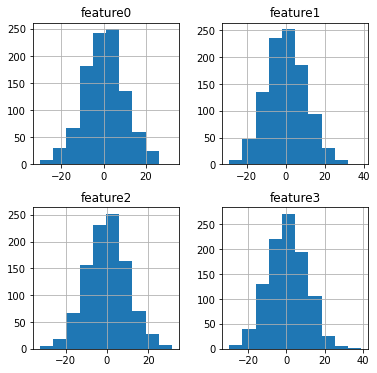

In [ ]:
dummydf = pd.read_csv('univariate_outlier.csv')
dummydf1 = dummydf.iloc[: , 1:5]

dummydf1.hist(figsize=(6,6));

In [ ]:
def out_std(s, nstd=3.0, return_thresholds=False):
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]


def out_iqr(s, k=1.5, return_thresholds=False):
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [ ]:
# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask = out_std(dummydf['feature0'], nstd=3.0)

dummydf1['feature0'][outlier_mask]



506   -30.195122
788   -29.069882
929    32.430930
Name: feature0, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



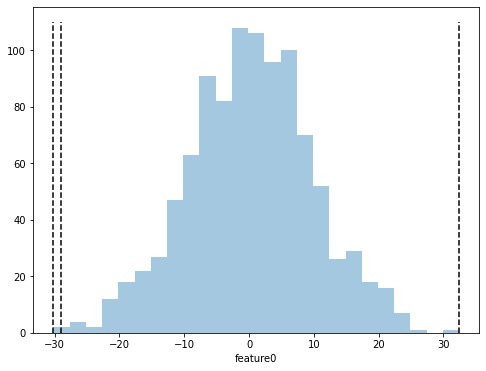

In [ ]:
# Let's try to visualize the outliers
plt.figure(figsize=(8,6))
sns.distplot(dummydf['feature0'], kde=False);
plt.vlines(dummydf['feature0'][outlier_mask], ymin=0, ymax=110, linestyles='dashed');

## Multivariate Outliers Exercises

### 2.10.6 Exercise 

Given a [dataset](https://drive.google.com/file/d/1vcgsO4t_VmX5YGGpZCiE_7u4PfZE-1Sp/view?usp=sharing). Use EllipticEnvelope to detect the outliers.


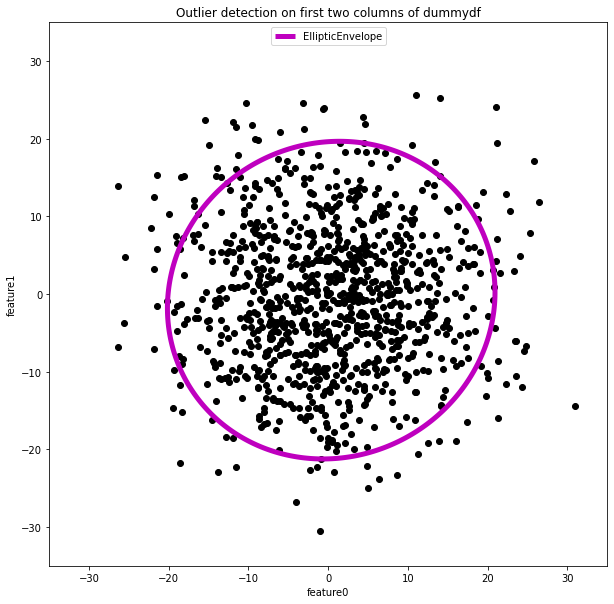

In [ ]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope()

legend = {}
xx, yy = np.meshgrid(np.linspace(-35, 35, 500), np.linspace(-35, 35, 500))
plt.figure(1, figsize=(10,10))


dummydf1 = pd.read_csv('Multi_Ex_1.csv')

clf.fit(dummydf1.values[:,:2])
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

legend['EllipticEnvelope'] = plt.contour(
    xx, yy, Z, levels=[0], linewidths=5, colors=['m'])

legend_values_list = list(legend.values())
legend_keys_list = list(legend.keys())

plt.figure(1, figsize=(10,10))# two clusters
plt.title("Outlier detection on first two columns of dummydf")
plt.scatter(dummydf1.values[:, 0], dummydf1.values[:, 1], color='black')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))
plt.legend(legend_values_list[0].collections, legend_keys_list,
           loc="upper center");
plt.ylabel("feature1");
plt.xlabel("feature0");


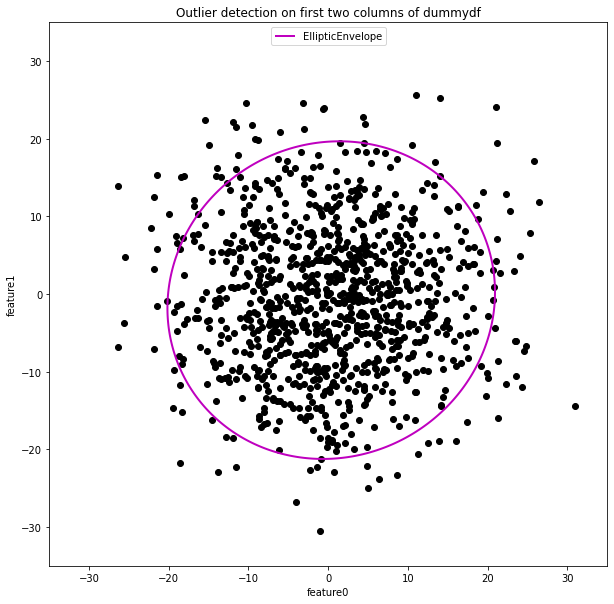

In [ ]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope()

legend = {}
xx, yy = np.meshgrid(np.linspace(-35, 35, 500), np.linspace(-35, 35, 500))
plt.figure(1, figsize=(10,10))


dummydf1 = pd.read_csv('Multi_Ex_1.csv')

clf.fit(dummydf1.values[:,:2])
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

legend['EllipticEnvelope'] = plt.contour(
    xx, yy, Z, levels=[0], linewidths=2, colors=['m'])

legend_values_list = list(legend.values())
legend_keys_list = list(legend.keys())

plt.figure(1, figsize=(10,10))# two clusters
plt.title("Outlier detection on first two columns of dummydf")
plt.scatter(dummydf1.values[:, 0], dummydf1.values[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="1.5")
arrow_args = dict(arrowstyle="->")

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))
plt.legend(legend_values_list[0].collections, legend_keys_list,
           loc="upper center");
plt.ylabel("feature1");
plt.xlabel("feature0");


### 2.10.7 Exercise 

Generate a sequence of values with a defined function like 2*x + n, where n is a random integer between -200 and 200 and x varying from 1 to 50. 

Insert a random integer like 1300 at 17th index. Now, detect the outlier using multivariate_normal.

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
#define x1 and x2 
x1 = np.arange(1,50,1) 
x2 = 2*(x1) + np.random.randint(-200,200)

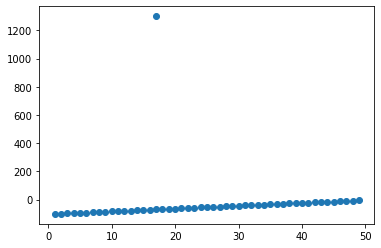

In [ ]:
#adding outliers
x1 = np.append(x1,17)
x2 = np.append(x2,1300)
data = np.stack((x1,x2),axis=1)
plt.scatter(x1,x2)

In [ ]:
from scipy.stats import multivariate_normal
#calculate the covariance matrix
data = np.stack((x1,x2),axis=0)
covariance_matrix = np.cov(data)

#calculating the mean
mean_values = [np.mean(x1),np.mean(x2)]

#multivariate normal distribution
model = multivariate_normal(cov=covariance_matrix,mean=mean_values)
data = np.stack((x1,x2),axis=1)

#finding the outliers
threshold = 1.0e-07
outlier = model.pdf(data).reshape(-1) < threshold

In [ ]:
for boolean,i in enumerate(outlier):
  if i == True:
    print(data[boolean]," is an Outlier")

[  17 1300]  is an Outlier







### 2.10.8 Exercise 


In [ ]:
import pandas as pd
import scipy as sp
import numpy as np

df = pd.read_csv('Multivariate_ex.csv')
df.head(61)

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335
...,...,...,...
56,0.30,59.3,405
57,0.30,62.6,405
58,0.30,63.0,405
59,0.30,63.2,405


In [ ]:
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['carat', 'depth', 'price']].head(500)
df_x['mahala'] = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

,carat,depth,price,mahala
0,0.23,61.5,326,4.291974
1,0.21,59.8,326,5.620387
2,0.23,56.9,327,12.352576
3,0.29,62.4,334,4.405627
4,0.31,63.3,335,5.216637


In [ ]:
df_x.columns

Index(['carat', 'depth', 'price', 'mahala', 'p_value'], dtype='object')

In [ ]:
# Assuming that the test statistic follows chi-square distributed with ‘n’ degree of freedom,
# the critical value at a 0.01 significance level and 2 degrees of freedom is computed as:

# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)


9.21034037197618

That means an observation can be considered as extreme if its Mahalanobis distance exceeds 9.21.

In [ ]:
df_x.loc[df_x['mahala'] > 9.21].head(10)

,carat,depth,price,mahala,p_value
2,0.23,56.9,327,12.352576,0.002078
24,0.31,58.1,353,9.397599,0.009106
91,0.86,55.1,2757,19.162551,0.000069
97,0.96,66.3,2759,11.832847,0.002695
172,1.17,60.2,2774,25.094692,0.000004
204,0.98,67.9,2777,18.083847,0.000118
219,0.53,57.5,2782,10.700149,0.004748
227,0.84,55.1,2782,18.197404,0.000112
241,1.01,64.5,2788,10.310638,0.005769
247,1.05,63.2,2789,11.698903,0.002881


### 2.10.9 Exercise 

If we prefer p value instead of the method used in the above exercise, then what should be our approach?

In [ ]:
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

In [ ]:
# Extreme values with a significance level of 0.01
df_x.loc[df_x.p_value < 0.01].head(10)

,carat,depth,price,mahala,p_value
2,0.23,56.9,327,12.352576,0.002078
24,0.31,58.1,353,9.397599,0.009106
91,0.86,55.1,2757,19.162551,0.000069
97,0.96,66.3,2759,11.832847,0.002695
172,1.17,60.2,2774,25.094692,0.000004
204,0.98,67.9,2777,18.083847,0.000118
219,0.53,57.5,2782,10.700149,0.004748
227,0.84,55.1,2782,18.197404,0.000112
241,1.01,64.5,2788,10.310638,0.005769
247,1.05,63.2,2789,11.698903,0.002881


If we compare the above observations against rest of the dataset, they are clearly extreme.

### 2.10.10 Exercise 


Generate a sequence of values with a defined function like $x^2$ + n, where n is a random integer between -200 and 200 and x varying from 1 to 50. 

Insert a random integer like 1300 at 17th index. Now, detect the outlier using multivariate_normal.

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
#define x1 and x2 
x1 = np.arange(1,50,1) 
x2 = np.square(x1) + np.random.randint(-200,200)

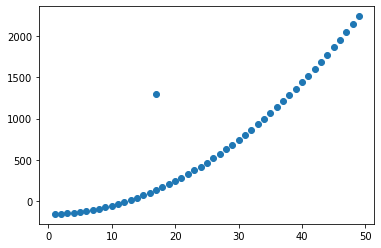

In [ ]:
#adding outliers
x1 = np.append(x1,17)
x2 = np.append(x2,1300)
data = np.stack((x1,x2),axis=1)
plt.scatter(x1,x2)

In [ ]:
from scipy.stats import multivariate_normal
#calculate the covariance matrix
data = np.stack((x1,x2),axis=0)
covariance_matrix = np.cov(data)

#calculating the mean
mean_values = [np.mean(x1),np.mean(x2)]

#multivariate normal distribution
model = multivariate_normal(cov=covariance_matrix,mean=mean_values)
data = np.stack((x1,x2),axis=1)

#finding the outliers
threshold = 1.0e-07
outlier = model.pdf(data).reshape(-1) < threshold

In [ ]:
for boolean,i in enumerate(outlier):
  if i == True:
    print(data[boolean]," is an Outlier")

[  17 1300]  is an Outlier


## 2.11 Reshaping DataFrame

In [ ]:
# Create a simple dataframe
   
# importing pandas as pd
import pandas as pd
import numpy as np
   
# creating a dataframe
df = pd.DataFrame({'A': ['John', 'Boby', 'Mina', 'Peter', 'Nicky'],
      'B': ['Masters', 'Graduate', 'Graduate', 'Masters', 'Graduate'],
      'C': [27, 23, 21, 23, 24]})
df

,A,B,C
0,John,Masters,27
1,Boby,Graduate,23
2,Mina,Graduate,21
3,Peter,Masters,23
4,Nicky,Graduate,24


In [ ]:
df.to_csv('')